# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('dengue_type2_bioactivity_data_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
984,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
985,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
986,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = df.iloc[:,-1]
Y

0      4.000000
1      4.909742
2      4.000000
3      4.292685
4      4.000000
         ...   
983    5.823909
984    6.301030
985    4.645892
986    5.376751
987    6.167491
Name: pIC50, Length: 988, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1,1,1,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
984,1,1,1,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
985,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,1,1,1,0,1,1,0,0,1,1,...,0,1,0,0,1,0,1,1,0,1


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [72]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8507314976084559

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([4.09682727, 4.7397383 , 4.1084837 , 4.32213187, 4.18028757,
       4.55961676, 4.04941805, 4.37315616, 4.27389717, 4.28683672,
       4.69268761, 4.33035792, 4.33157276, 4.41150659, 4.1404551 ,
       4.24551558, 4.45888838, 4.08085719, 4.26932659, 4.13215677,
       4.31816581, 4.52251656, 4.12708627, 4.359941  , 4.23882643,
       4.19309114, 4.40400859, 4.51382629, 4.61371703, 4.42155877,
       4.29081298, 4.20860277, 4.22749916, 4.33979393, 4.15652335,
       4.37181772, 4.25299128, 4.62445335, 4.38689372, 4.42605541,
       4.27020118, 4.29339569, 4.33143529, 4.16817802, 4.32859506,
       4.17652739, 4.14277674, 4.40237773, 4.43773174, 4.11404339,
       4.06584281, 4.20253902, 4.25427859, 4.29870613, 4.2599896 ,
       4.23767477, 4.42224151, 4.25090754, 4.51429833, 4.11542483,
       4.26582401, 4.40411087, 4.25404493, 4.52111672, 4.1686317 ,
       4.6690099 , 4.1003266 , 4.12903   , 4.06485363, 4.16531522,
       4.39124084, 4.64696355, 4.45307972, 4.45564653, 4.06298

## Model Performance

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.01
Coefficient of determination (R^2): 0.85


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

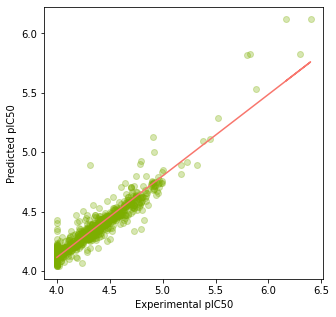

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [15]:
import pickle

In [80]:
pickle.dump(model, open('dengue_type2_virus_model.pkl', 'wb'))